In [1]:
#Import all the libraries necessary to this research

#Data Preparation and Analysis
import pandas as pd
import numpy as np

#Data Visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning and Model Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Disable Warnings
from warnings import filterwarnings

In [2]:
filterwarnings('ignore') 

# Part I: Research Question


# A1:PROPOSAL OF QUESTION
What is the most effective way to process customer records in order to optimize them for future predictions using Machine Learning models?





# 







 
# A2:DEFINED GOAL 

During the previous analyses, it was noted that there existed a significant degree of multicollinearity among the different features within the dataset, resulting in an impact on the accuracy of the models. To address this issue, my objective for this analysis is to utilize Principal Component Analysis (PCA) to generate a set of features that account for at least 80% of the variability within the data. By doing so, I aim to create a new set of variables and reevaluate the previous models to assess if they yield more favorable outcomes.




# 













# Part II: Method Justification


# B1:EXPLANATION OF PCA

PCA, or Principal Component Analysis, is a powerful method used to extract significant variables, called components, from a large set of features in a dataset. Its objective is to capture as much information as possible by projecting the data from a high-dimensional space to a lower-dimensional space. This not only reduces the number of variables but also facilitates more meaningful data visualization.  It is particularly valuable when dealing with three or higher-dimensional data and is typically performed on a symmetric correlation or covariance matrix with standardized data. (Avcontentteam, 2016)

By performing PCA, correlated features are transformed using a linear combination to create a new set of uncorrelated features, or components. These components are ranked based on the amount of variability they explain in the dataset. The most important components, which contribute the most to the variability, can be retained for regression and classification modeling, effectively addressing the issue of multicollinearity (Brems, 2019).

The transformed components retain a significant amount of information from the original dataset while reducing the dimensionality. The expected outcome of this analysis is to significantly decrease the number of features in the dataset, thereby reducing multicollinearity and improving the overall efficiency and interpretability of the models.



# 







# B2:PCA ASSUMPTION

PCA relies on the assumption of a linear relationship between all variables. This assumption arises from the use of Pearson correlation coefficients in PCA, which require a linear relationship. However, in practice, this assumption can be relaxed when dealing with categorical data. While linearity can be assessed using a matrix scatterplot, this approach can become overwhelming due to the large number of potential linear relationships, often exceeding 500. Therefore, it is advisable to randomly select a few representative relationships between variables and test them, rather than examining every possible combination. This approach helps strike a balance between assessing linearity and avoiding excessive computational burden.

In [3]:
# Load the data set
churn_data = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None

# View the head of data set
churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Explore data

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
# Perform summary statistics for numerical attributes  
# Reference: E1

churn_data.describe()  

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# 




# Part III: Data Preparation


# C1.CONTINUOUS DATASET VARIABLES

- In the context of PCA, only continuous variables will hold significance for this analysis.

- These significant attributes are idetified below:
Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, Contacts, Age, Tenure, Income, Bandwidth_GB_Year, Outage_sec_perweek, Email, Population, Children, MonthlyCharge, Lat, Lng



In [6]:
# Generate a new dataframe comprising only the continuous variables.

churnPCA_data = churn_data[['Lat', 'Lng','Contacts', 'Tenure', 'Age', 'Email', 'Population', 'Income', 
                            'Outage_sec_perweek', 'Yearly_equip_failure', 'Children', 'MonthlyCharge', 
                        'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

churnPCA_data.head()

,Lat,Lng,Contacts,Tenure,Age,Email,Population,Income,Outage_sec_perweek,Yearly_equip_failure,Children,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,0,6.795513,68,10,38,28561.99,7.978323,1,0,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,0,1.156681,27,12,10446,21704.77,11.699080,1,1,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,0,15.754144,50,9,3735,9609.57,10.752800,1,4,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,2,17.087227,48,15,13863,18925.23,14.913540,0,1,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,2,1.670972,83,16,11352,40074.19,8.147417,1,0,149.948316,271.493436,4,4,4,3,4,4,4,5


# 













# C2. STANDARDIZATION OF DATASET VARIABLES

In [7]:
# Apply standard scaler on the new dataframe
# Reference: E2

scale_data = scale(churnPCA_data) 
scale_data

array([[ 3.21740984, -2.8104319 , -1.0058517 , ...,  0.48638938,
        -0.49540563,  0.49038392],
       [ 1.0246907 ,  0.43164437, -1.0058517 , ..., -0.48116458,
         0.47693123,  0.49038392],
       [ 1.21357022, -2.14207931, -1.0058517 , ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [-0.59538486, -0.63734869, -1.0058517 , ...,  0.48638938,
         0.47693123,  1.46259628],
       [-0.95223392,  0.37281313,  0.00586797, ..., -0.48116458,
         1.44926808,  0.49038392],
       [-0.74483171,  0.47811762,  0.00586797, ..., -0.48116458,
         0.47693123, -2.42625317]])

In [8]:
# Generate a pandas dataframe using the standardized array.
cols = churnPCA_data.columns
churnScaled_data = pd.DataFrame(scale_data, columns=cols)


# Print dataframe head
churnScaled_data.head()

,Lat,Lng,Contacts,Tenure,Age,Email,Population,Income,Outage_sec_perweek,Yearly_equip_failure,Children,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,3.217410,-2.810432,-1.005852,-1.048746,0.720925,-0.666282,-0.673405,-0.398778,-0.679978,0.946658,-0.972338,-0.003943,-1.138487,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,1.024691,0.431644,-1.005852,-1.262001,-1.259957,-0.005288,0.047772,-0.641954,0.570331,0.946658,-0.506592,1.630326,-1.185876,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,1.213570,-2.142079,-1.005852,-0.709940,-0.148730,-0.996779,-0.417238,-1.070885,0.252347,0.946658,0.890646,-0.295225,-0.612138,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,-1.065031,-1.746273,1.017588,-0.659524,-0.245359,0.986203,0.284537,-0.740525,1.650506,-0.625864,-0.506592,-1.226521,-0.561857,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,-1.724710,-0.331512,1.017588,-1.242551,1.445638,1.316700,0.110549,0.009478,-0.623156,0.946658,-0.972338,-0.528086,-1.428184,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596


In [9]:
# Convert scaled datafrae into an excel file.
# Reference: E3

churnScaled_data.to_excel('churnScaled_data.xlsx', index = False, encoding = 'utf-8') 

# 







# PartIV: Analysis


# D1. PRINCIPAL COMPONENTS

In [10]:
# Create an instance of a PCA model and apply it to the scaled dataframe.
# Reference: E4

pca_ = PCA()  
pca_.fit(churnScaled_data)

PCA()

In [11]:
# Print all principal components matrices

pca_.components_

array([[-1.11224657e-03,  8.05819399e-03, -8.72526329e-03,
        -1.62662110e-02,  6.50872306e-03,  8.79175823e-03,
        -2.18128395e-03,  1.02244405e-03, -1.74936656e-02,
        -7.70545082e-03,  4.12840237e-03,  9.79819920e-04,
        -1.67899389e-02,  4.58718711e-01,  4.33833886e-01,
         4.00518325e-01,  1.45752051e-01, -1.75652341e-01,
         4.05012316e-01,  3.58210511e-01,  3.08715988e-01],
       [-2.31207748e-02,  9.44743876e-03,  3.45914531e-03,
         7.02098205e-01,  5.21341098e-04, -1.97411527e-02,
        -7.70736959e-04,  5.80777653e-03,  3.90861691e-03,
         1.76711247e-02,  1.59568291e-02,  3.98835005e-02,
         7.03617405e-01,  3.13345268e-02,  3.86172310e-02,
         3.55977192e-02, -3.98140691e-02,  5.65295150e-02,
        -6.73644002e-03,  1.73660383e-03, -1.33498148e-02],
       [-7.37976389e-03,  2.24453811e-02, -1.15239627e-02,
        -6.36930267e-02, -2.88357024e-02, -2.77271616e-03,
         1.56158359e-02,  2.56219223e-02, -1.41664595e

# 













# D2. IDENTIFICATION OF TOTAL NUMBER OF COMPONENTS

In [12]:
# Get eigenvalues

eigenvalues = pca_.explained_variance_
eigenvalues

array([2.94898931, 1.99766749, 1.63703866, 1.23549638, 1.05325731,
       1.04466794, 1.02343529, 1.01197976, 1.00155443, 0.9928532 ,
       0.98530147, 0.96395649, 0.96119612, 0.77976345, 0.73504438,
       0.68936348, 0.59161398, 0.53762248, 0.48167183, 0.32416813,
       0.00545863])

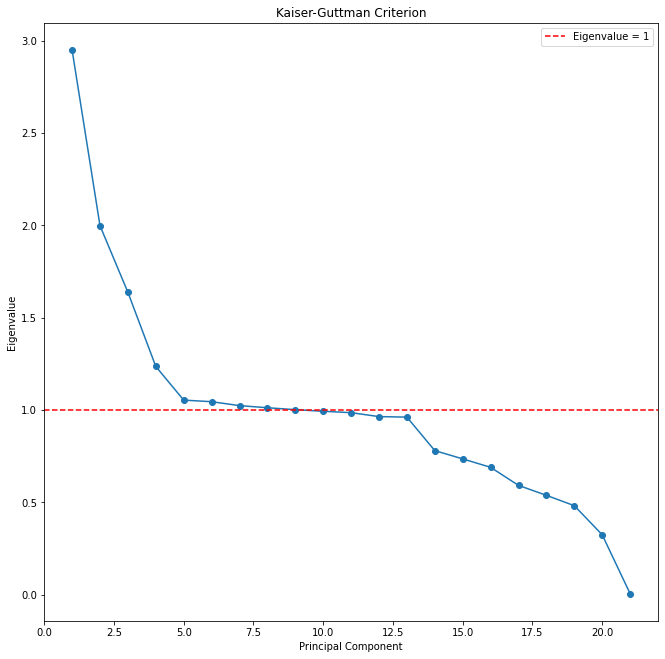

In [13]:
# Plot eigenvalues

plt.figure(figsize=(11, 11))  
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Kaiser-Guttman Criterion')
plt.legend()
plt.show()

The optimum number of components to be selected is 9. This can be seen from the visual above after using the Kaiser-Guttman Criterion

In [22]:
# Using the 9 selected components, create an instance of a PCA model 
# Reference: E4

pca_2 = PCA(n_components = 9)  

# Train the model using the scaled dataframe
pca_2.fit(churnScaled_data)

PCA(n_components=9)

# 






# D3. TOTAL VARIANCE OF COMPONENTS

In [23]:
# Show the Variance of all the 9 Principal Components
# Reference: E6

for i, explained_variance in enumerate(pca_2.explained_variance_): 
    principal_component = i + 1
    variance = round(explained_variance, 2)
    percentage_variance = round(pca_2.explained_variance_ratio_[i] * 100, 2)
    print(f"Principal Component {principal_component}:")
    print(f"Variance: {variance}")
    print(f"Percentage Variance of data captured: {percentage_variance}%")
    print()


Principal Component 1:
Variance: 2.95
Percentage Variance of data captured: 14.04%

Principal Component 2:
Variance: 2.0
Percentage Variance of data captured: 9.51%

Principal Component 3:
Variance: 1.64
Percentage Variance of data captured: 7.79%

Principal Component 4:
Variance: 1.24
Percentage Variance of data captured: 5.88%

Principal Component 5:
Variance: 1.05
Percentage Variance of data captured: 5.01%

Principal Component 6:
Variance: 1.04
Percentage Variance of data captured: 4.97%

Principal Component 7:
Variance: 1.02
Percentage Variance of data captured: 4.87%

Principal Component 8:
Variance: 1.01
Percentage Variance of data captured: 4.82%

Principal Component 9:
Variance: 1.0
Percentage Variance of data captured: 4.77%



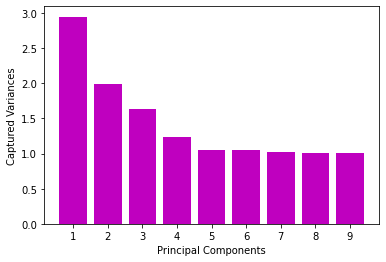

In [24]:
# Bar Chart: Explained Variances
# Reference: E7

captured_variance = pca_2.explained_variance_   
principal_components = range(1, pca_2.n_components_ + 1)

plt.bar(principal_components, captured_variance, color='m')
plt.xlabel('Principal Components')
plt.ylabel('Captured Variances')
plt.xticks(principal_components)
plt.show()

# 







# D4. TOTAL VARIANCE CAPTURED BY COMPONENTS

In [25]:
# Total variance captured by all components:

y = 0

for i in range(pca_2.n_components_):
    y += pca_2.explained_variance_ratio_[i]

print('The total variance explained by the 9 components: ', round(y * 100, 2), '%.')

The total variance explained by the 9 components:  61.68 %.


# 






# D5. SUMMARY OF DATA ANALYSIS

Principal component analysis (PCA) was conducted on the scaled data to identify the key sources of variance in the dataset. The Kaiser-Guttman criterion was used to determine the number of principal components to retain. The Kaiser-Guttman criterion states that only principal components with eigenvalues greater than 1 should be retained, as these components explain more variance than any single original variable.

Based on the Kaiser-Guttman criterion, the first 9 principal components were retained, explaining 61.7% of the total variance in the scaled data. The first principal component explained 14.0% of the variance, the second component explained 9.5%, and so on until the ninth component which explained 4.8%.


In summary, the application of the Kaiser-Guttman criterion led to retaining 9 principal components, explaining 61.7% of the total variance in the data. The criterion provided a systematic and rigorous approach for determining the optimal number of components that capture the most meaningful variance in the dataset. The first 9 components identified represent the primary sources of variance and will be used for further analysis and modeling.

My next step is to build a PCA model which retains 80% of the variability in the data to satisfy the original aim of this analysis stated in Section D2.

In [18]:
# Build a PCA model which reatins 80% of variability

pca_3 = PCA(n_components = 0.8)

In [19]:
# Fit data to model

pca_3.fit(churnScaled_data)

PCA(n_components=0.8)

In [20]:
# Prints explained Variances
# Reference: E6

for i in range(pca_3.n_components_):  
    print("Principal Component", i+1, 
          " \n Variance: ", round(pca_3.explained_variance_[i],2), 
          "  |  Precentage Variance of data captured: ",  round(pca_3.explained_variance_ratio_[i]*100,2), '% \n')

Principal Component 1  
 Variance:  2.95   |  Precentage Variance of data captured:  14.04 % 

Principal Component 2  
 Variance:  2.0   |  Precentage Variance of data captured:  9.51 % 

Principal Component 3  
 Variance:  1.64   |  Precentage Variance of data captured:  7.79 % 

Principal Component 4  
 Variance:  1.24   |  Precentage Variance of data captured:  5.88 % 

Principal Component 5  
 Variance:  1.05   |  Precentage Variance of data captured:  5.02 % 

Principal Component 6  
 Variance:  1.04   |  Precentage Variance of data captured:  4.97 % 

Principal Component 7  
 Variance:  1.02   |  Precentage Variance of data captured:  4.87 % 

Principal Component 8  
 Variance:  1.01   |  Precentage Variance of data captured:  4.82 % 

Principal Component 9  
 Variance:  1.0   |  Precentage Variance of data captured:  4.77 % 

Principal Component 10  
 Variance:  0.99   |  Precentage Variance of data captured:  4.73 % 

Principal Component 11  
 Variance:  0.99   |  Precentage Va

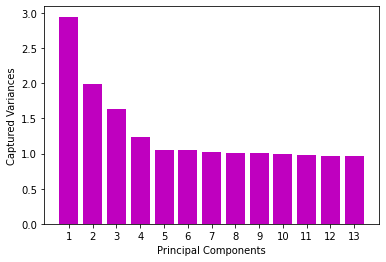

In [21]:
# Bar Chart: Explained Variances
# Reference: E7

comps = range(1, pca_3.n_components_+1) 
plt.bar(comps, pca_3.explained_variance_, color='m')
plt.xlabel('Principal Components')
plt.ylabel('Captured Variances')
plt.xticks(comps)
plt.show()

# 






# Part V: Attachments

# E. SOURCES FOR THIRD-PARTY CODE

E1. https://www.w3schools.com/python/pandas/ref_df_describe.asp

E2. https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/preprocessing.html

E3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

E4. https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

E5. https://www.statology.org/scree-plot-python/

E6. https://stackoverflow.com/questions/57293716/sklearn-pca-explained-variance-and-explained-variance-ratio-difference

E7. https://www.machinelearningplus.com/plots/bar-plot-in-python/

# 















# F. SOURCES


1. Brems, M. (2019, June 10th). A one-stop shop for principal component analysis. Retrieved August 11, 2023, at
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c (https://towardsdatascience.com/a-one-stopshop-for-principal-component-analysis-5582fb7e0a9c)

2. Avcontentteam. (2016, March 21st). PCA: A Practical Guide to Principal Component Analysis in R & Python. Retrieved August 11, 2023, at https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

3. Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065). Retrieved August 11, 2023, at 20150202. https://doi.org/10.1098/rsta.2015.0202